# Как компьютер "видит" изображение?

Самый маленький элемент на изображении называется **пиксель**. В целом это просто точка на изображении. Картинка содержит множество пикселей в виде "таблицы" (строки х столбцы). 

Вы часто можете увидеть количество строк и столбцов под кодовым названием **"разрешение изображения"**. Например, Ultra HD TV обладает разрешением в 3840х2160 (это означает, что в строке (по оси х) 3840 пикселей, а в столбце (по оси у) 2160 пикселей). 

Но компьютер не воспринимает пиксели как цветные точки. Компьютер понимает только цифры. Чтобы преобразовать цвета в цифры есть специальные цветовые модели. 

В цветных изображениях пиксели часто представлены в **RGB** цветовой модели. 
* R = Red 
* G = Green
* B = Blue 

Каждый пиксель - это смесь всех трёх цветов. RGB прекрасно справляется с представлением всех цветов, которые может воспринимать человек. 

Поскольку компьютер понимает только цифры каждый пиксель представляет собой 3 числа, соответствующие количеству красного, зелёного и синего в этом пикселе. 

В чёрно-белых картинках, каждый пиксель - это всего одно число, которое показывает количество света (интенсивность света), содержащееся в этом пикселе. Во многих случаях диапазон интенсивности заключается от 0 (чёрный цвет) до 255 (белый цвет). Всё, что между, это вариации серого. 

Если каждый чёрно-белый пиксель - это число, то картинка - это ни что иное как матрица (таблица) чисел. 

<p align="center">
    <img src="https://github.com/serykhelena/PYGuides/blob/main/notebooks/assets/cv_2.png?raw=true" alt="drawing" width="400"/>
</p>

В цветных картинках три такие матрицы для каждого из цветов (красный, зелёный и синий каналы). 

<p align="center">
    <img src="https://github.com/serykhelena/PYGuides/blob/main/notebooks/assets/cv_3.png?raw=true" alt="drawing" width="400"/>
</p>

# Загрузка изображений

Перед тем, как работать с изображением, логичным шагом будет загрузить данные, например из файла или по адресу URL. 

In [1]:
import os

import cv2 
import matplotlib.pyplot as plt 

IMG_FPATH = os.path.join(os.pardir, "assets", "cv_1.jpg")

## Чтение цветной картинки из файла

Чтобы загрузить картинку из файла воспользуемся библиотекой OpenCV, функцией `cv2.imread()`

У этой функции есть три флага, которые отвечают за способ загрузки изображения:

* `cv2.IMREAD_COLOR` - загрузка цветного изображения (флаг по умолчанию). **НО** если на изображении были какие-то прозрачные области, они перестанут быть таковыми.
* `cv2.IMREAD_GRAYSCALE` - загрузка изображения в оттенках серого
* `cv2.IMREAD_UNCHANGED` - загрузка изображения c альфа каналом

> Если лениво писать полное имя флага, то можно просто использовать цифры от 1, 0 и -1 (соответственно).

`Но лучше никогда так не делать, потому что в один прекрасный день к вам может прибежать человек и спросить: "Какой прекрасный человек использовал числа вместо именованных констант, значения которых изменились в новой версии?". Если у вас есть готовый ответ для любого такого человека, то смело пользуйтесь предыдущим советом.`

**Альфа-канал** - это значение, такое же как и цветовые компоненты (красный, зелёный, синий). Оно определяет степень прозрачности для каждого пикселя изображения. Например, если вы загрузите картинку с расширением .png и флагом cv2.IMREAD_UNCHANGED, то вам будут доступны значения прозрачности пикселя. Если же загрузите .jpeg картинку, то не ждите такого.

Ну что, грузим тестовую картинку с флагом по умолчанию (т.е. его можно не прописывать явно).

In [2]:
image = cv2.imread(IMG_FPATH) 
# = cv2.imread('...', cv2.IMREAD_COLOR)
# = cv2.imread('...', 0)
# выбирайте вариант, который больше по душе

Чтобы проверить, что картинка загрузилась, или посмотреть что получилось после каких-либо манипуляций с изображением, можно использовать функцию `cv2.imshow()`. Эта функция показывает изображение в отдельном окне. Размер окна автоматически подстраивается под размер изображения. 

In [4]:
# Показать изображение
cv2.imshow('DOGGY!!!', image)
# Закрыть окно с изображением при нажатии любой кнопки на клавиатуре
# например, Esc
cv2.waitKey(0)
# Закрыть все окна 
cv2.destroyAllWindows() 

* `cv2.waitKey(0)` - функция ждёт указанное время (мс), чтобы любая кнопка на клавиатуре была нажата. Т.к. здесь передан 0, то ждать она будет бесконечно долго, пока вы не сделаете что-то с этим. Также можно указать определённую клавишу и ждать нажатия только её. 
* `cv2.destroyAllWindows()` - уничтожает все созданные ранее окна. Чтобы уничтожить какое-то определённое окно, используйте функцию `cv2.destroyWindow()` и укажите имя окна в качестве аргумента функции. 

Для удобства просмотра картинки в ноутбуке, можно использовать библиотеку `matplotlib` и функцию `imshow()`.

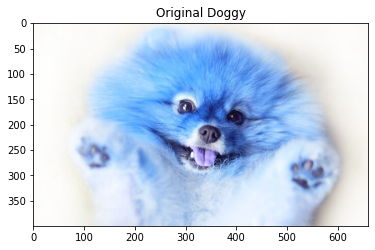

In [6]:
plt.imshow(image)
plt.title("Original Doggy")
plt.show()

Хммм.. странный какой-то пёсель, не правда ли? 
Такая расскраска не случайна, всё дело в порядке цветовых каналов. Наша картинка - RGB, но функция `cv2.imread()` возвращает картинку - BGR. Вот и получается, что каналы перемешались. 

Чтобы увидеть оригинальную расцветку, нужно вернуть оригинальный порядок каналов. 

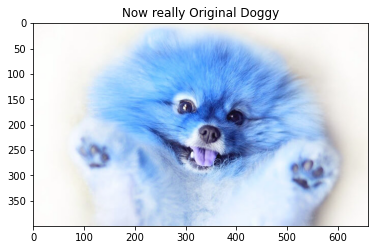

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.imshow(image)
plt.title("Now really Original Doggy")
plt.show()

Та-дам! 

В случае с функцией `cv2.imshow()` менять порядок каналов не нужно, она внутри сама с этим справляется. Но такую особенность лучше не забывать, чтобы неожиданностей не случалось. 

Теперь загрузим картинку с флагом cv2.IMREAD_GRAYSCALE. 

In [9]:
image = cv2.imread(IMG_FPATH, cv2.IMREAD_GRAYSCALE) 
# = cv2.imread('...', 1)

In [10]:
# Показать изображение
cv2.imshow('Grayscaled Doggy', image)
# Закрыть окно с изображением при нажатии любой кнопки на клавиатуре
cv2.waitKey(0)
# Закрыть все окна 
cv2.destroyAllWindows() 

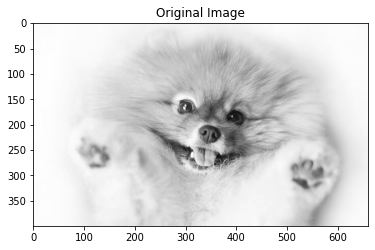

In [11]:
plt.imshow(image, cmap='gray')
plt.title("Grayscaled Doggy")
plt.show()

Оп, и картинка уже чёрно-белая вообще без каких-то усилий с нашей стороны. 

Ну и теперь последний флаг. 

In [12]:
image = cv2.imread(IMG_FPATH, cv2.IMREAD_UNCHANGED) 
# = cv2.imread('...', 2)

In [13]:
# Показать изображение
cv2.imshow('Again original Doggy', image)
# Закрыть окно с изображением при нажатии любой кнопки на клавиатуре
cv2.waitKey(0)
# Закрыть все окна 
cv2.destroyAllWindows() 

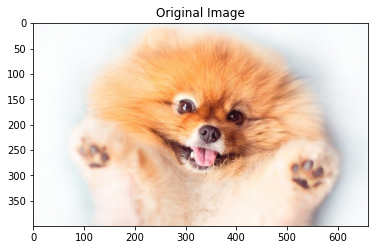

In [14]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.imshow(image)
plt.title("Super-Mega-Ultra Doggy")
plt.show()

Внешне никакой разницы видно не будет, но загруженных каналов будет уже не 3, а 4 (т.е. матрица будет четырёхмерной). Чтобы увидеть на изображении эффект прозрачности, нужно реализовать операцию альфа-смешивания (alpha blending) - наложение изображений друг на друга с целью создания эффекта частичной прозрачности. 

Но этого мы сейчас делать не будем. Но вот вам интересная [ссылка](http://robocraft.ru/blog/computervision/352.html) про это.

## Чтение цветной картинки из URL

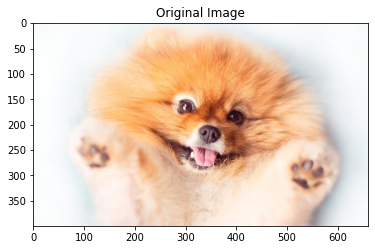

In [15]:
from skimage import io

# Используем scikit-image фреймворк, чтобы загрузить по URL. Он загружает изображения в формате RGB
url = "https://github.com/serykhelena/PYGuides/blob/main/notebooks/assets/cv_1.jpg?raw=true"
image = io.imread(url,plugin='matplotlib')

# Отображаем картинку и наслаждаемся 
plt.imshow(image)
plt.title("Internet Doggy")
plt.show()

Всё аналогично, главное указать правильный URL. 

## Полезные ссылки

* [Getting started with Images](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html)
* [Using keys for waitKey](https://stackoverflow.com/questions/14494101/using-other-keys-for-the-waitkey-function-of-opencv)
* [ord function](https://pythonz.net/references/named/ord/)